In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [7]:
# Display the first few rows of the feature matrix
import pandas as pd
df = pd.DataFrame(X, columns=data.feature_names)
print("\nSample Data:")
print(df.head())




Sample Data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

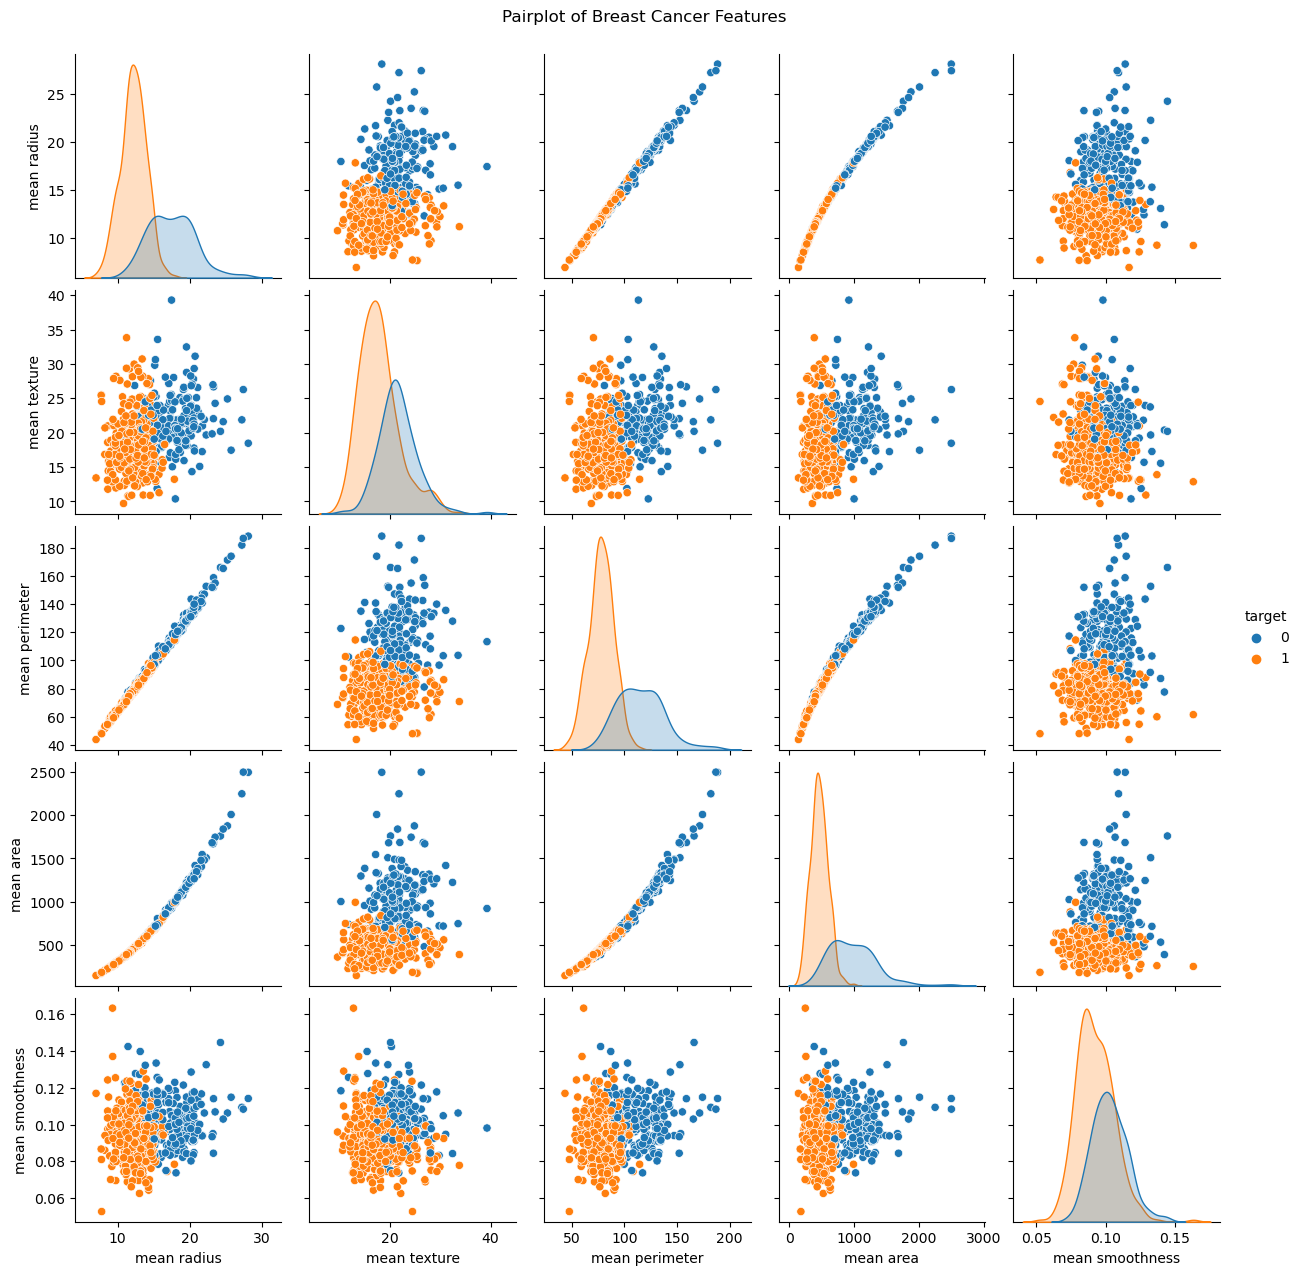

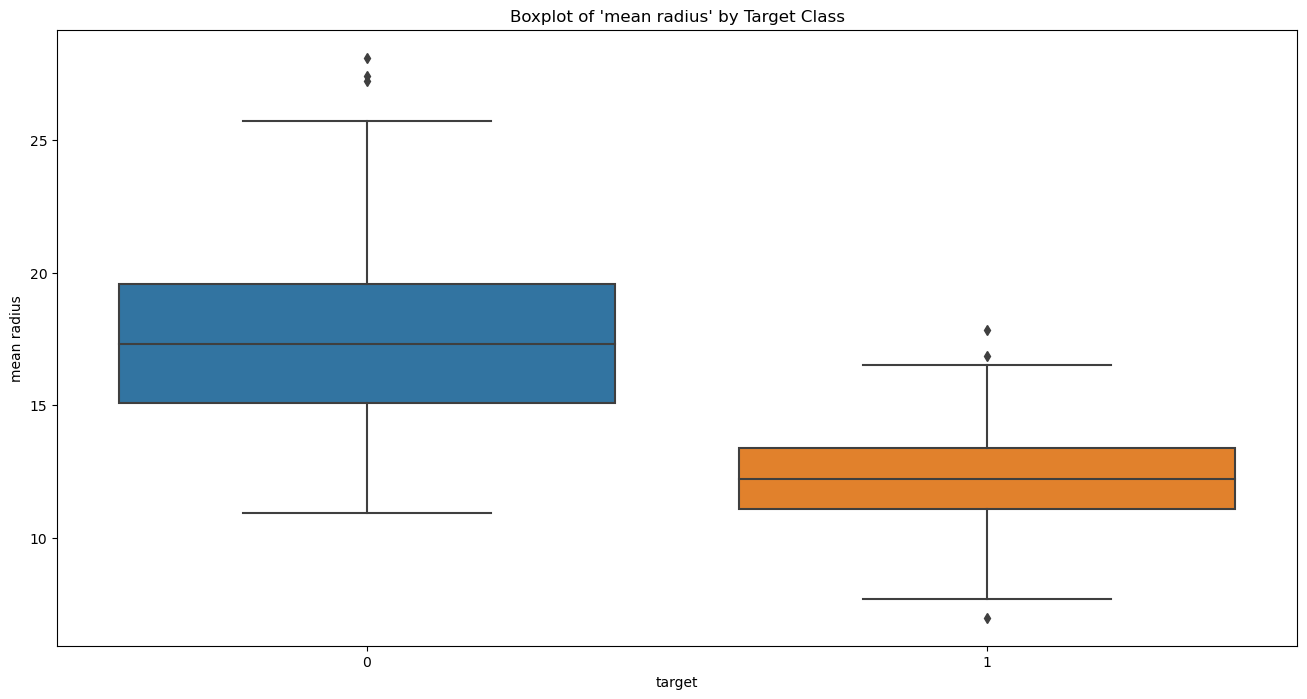

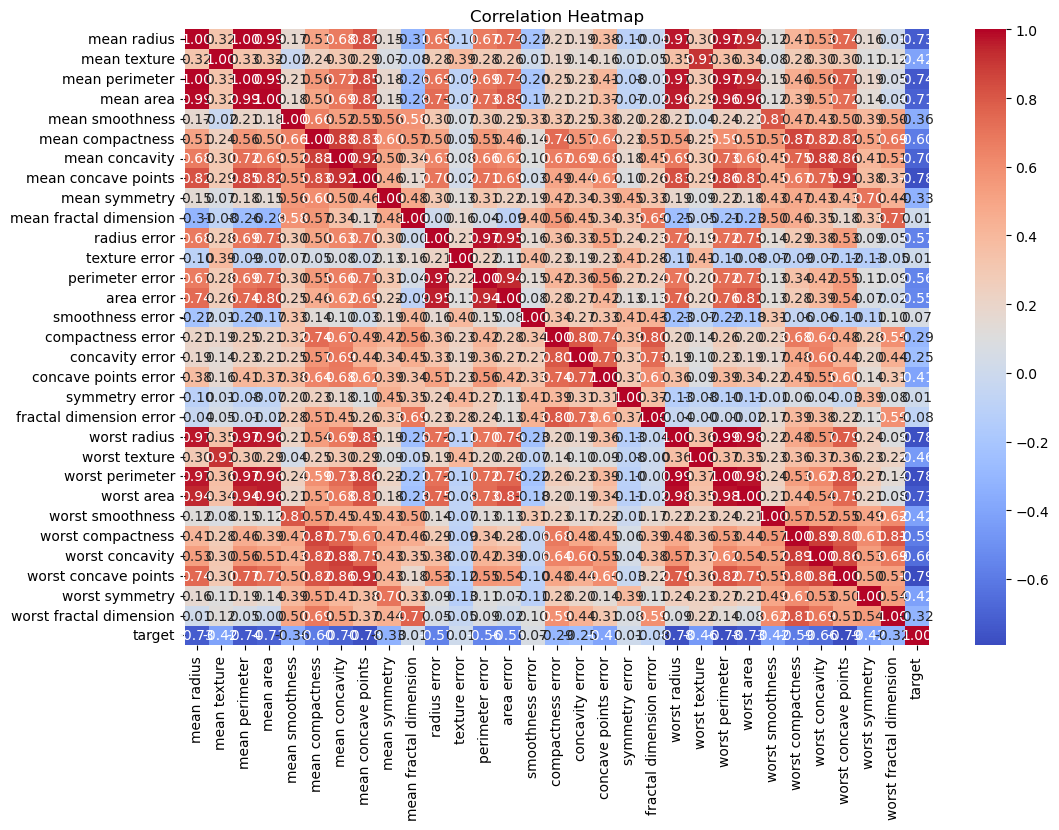

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert the data to a DataFrame for easier plotting
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='target', vars=feature_names[:5])  # Adjust vars as needed
plt.suptitle("Pairplot of Breast Cancer Features", y=1.02)
plt.show()

# Boxplot to visualize feature distributions by target class
plt.figure(figsize=(16, 8))
sns.boxplot(x='target', y='mean radius', data=df)  # Example with 'mean radius', adjust as needed
plt.title("Boxplot of 'mean radius' by Target Class")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


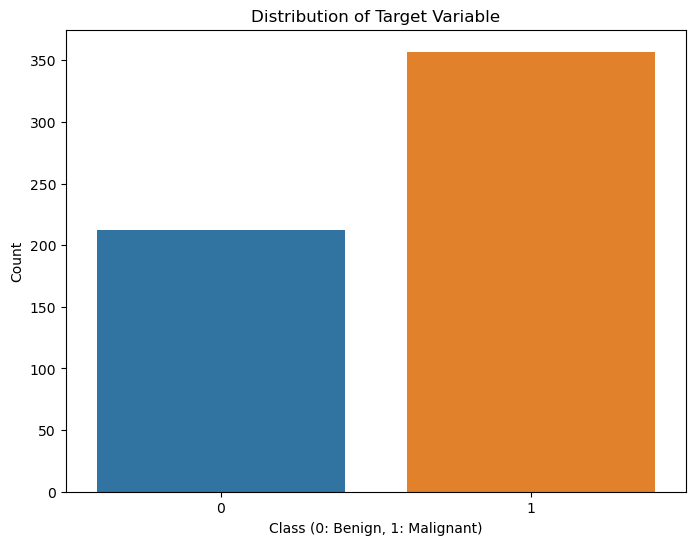

In [21]:
# Countplot for the distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Class (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()




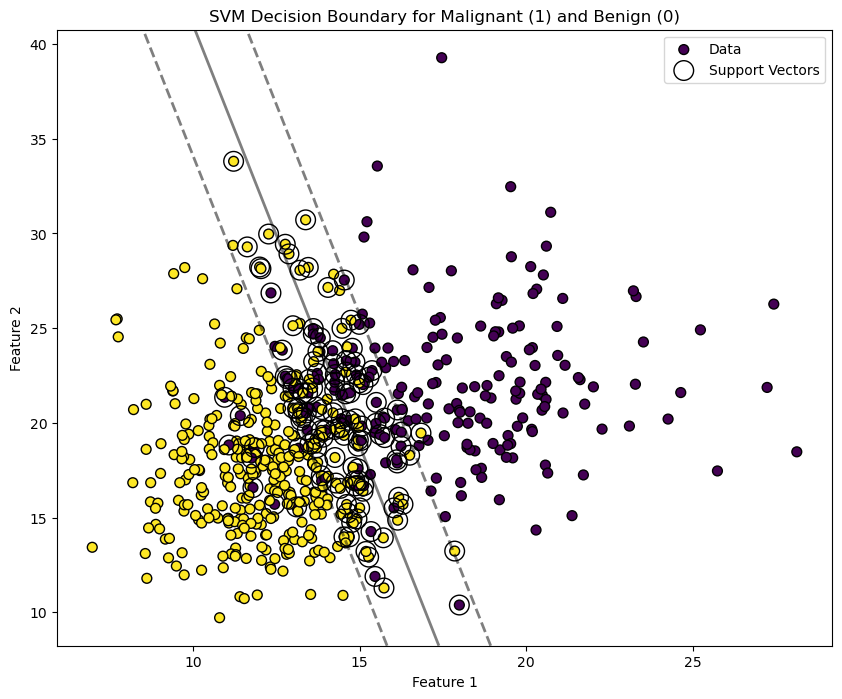

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Using only the first two features for visualization
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, label='Data')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], linewidths=[2, 2, 2])

# Plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=200, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM Decision Boundary for Malignant (1) and Benign (0)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [2]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Function to take user input and make predictions
def predict_user_input():
    # Prompt user to input values for each feature
    feature_values = []
    for feature_name in data.feature_names:
        value = float(input(f"Enter value for {feature_name}: "))
        feature_values.append(value)

    # Make prediction using the trained model
    user_data = [feature_values]
    prediction = classifier.predict(user_data)

    # Display the prediction
    if prediction[0] == 0:
        print("Prediction: Malignant")
    else:
        print("Prediction: Benign")

# Call the function to make predictions based on user input
predict_user_input()


Enter value for mean radius: 17.99
Enter value for mean texture: 3.6
Enter value for mean perimeter: 35.78
Enter value for mean area: 2.44
Enter value for mean smoothness: 41.83
Enter value for mean compactness: 2.33
Enter value for mean concavity: 3.89
Enter value for mean concave points: 4.57
Enter value for mean symmetry: 6.98
Enter value for mean fractal dimension: 55.6
Enter value for radius error: 0.44
Enter value for texture error: 0.9
Enter value for perimeter error: 0.88
Enter value for area error: 0.01
Enter value for smoothness error: 0.98
Enter value for compactness error: 0.79
Enter value for concavity error: 0.009
Enter value for concave points error: 0.90
Enter value for symmetry error: 0.87
Enter value for fractal dimension error: 0.871
Enter value for worst radius: 0.8927
Enter value for worst texture: 0.83746
Enter value for worst perimeter: 0.938
Enter value for worst area: 0.292447
Enter value for worst smoothness: 0.394875
Enter value for worst compactness: 0.338
E

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Generate additional test data (thousands of test cases)
num_test_cases = 10000
additional_test_data = np.random.rand(num_test_cases, X.shape[1])  # Replace this with your actual test data

# Make predictions on the additional test set
additional_y_pred = classifier.predict(additional_test_data)

# Create an array of actual labels (1.0 for positive class)
actual_labels = np.ones(num_test_cases)

# Evaluate the model on the additional test data
additional_accuracy = accuracy_score(actual_labels, additional_y_pred)
additional_classification_report_str = classification_report(actual_labels, additional_y_pred, zero_division=1)

# Print the results for the additional test data
print(f'Additional Test Data Accuracy: {additional_accuracy:.2f}')
print('Additional Test Data Classification Report:\n', additional_classification_report_str)


Additional Test Data Accuracy: 1.00
Additional Test Data Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [7]:
pip install openml



     ---------------------------------------- 0.0/131.3 kB ? eta -:--:--
     ------------------ -------------------- 61.4/131.3 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 122.9/131.3 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 131.3/131.3 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   -----------------------

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import openml

# Load Breast Cancer Wisconsin dataset (ID: 151)
dataset = openml.datasets.get_dataset(151, download_data=True, download_qualities=True, download_features_meta_data=True)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)



Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

        DOWN       0.73      0.90      0.80      5191
          UP       0.80      0.56      0.66      3872

    accuracy                           0.75      9063
   macro avg       0.76      0.73      0.73      9063
weighted avg       0.76      0.75      0.74      9063

